# Fish abundance and catch data

[for the Northwest European Shelf and Mediterranean Sea from 2006 to 2098 derived from climate projections](https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-fisheries-abundance?tab=overview)

In [1]:
import netCDF4 as nc
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

----
&nbsp;
Need to open .nc files. How do we do this?
- [netCDF4 docs](https://unidata.github.io/netcdf4-python/)

In [2]:
# Open bluefin dataset
filename = 'Datasets/SS_DBEM_NEMO_fish_abundance-abundance-rcp45-msy06-bluefin_tuna-v0.1.nc'
bluefin = nc.Dataset(filename)

In [3]:
print(bluefin)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(44), latitude(107), longitude(112)
    variables(dimensions): float32 bluefin_tuna(time, latitude, longitude), float32 latitude(latitude), float32 longitude(longitude), float64 time(time)
    groups: 


In [4]:
print(bluefin.variables.keys()) # Get all variable names

dict_keys(['bluefin_tuna', 'latitude', 'longitude', 'time'])


In [5]:
tuna = bluefin.variables['bluefin_tuna']
print(tuna)

<class 'netCDF4._netCDF4.Variable'>
float32 bluefin_tuna(time, latitude, longitude)
    units: count
    _FillValue: -9.223372e+18
    standard_name: number_of_bluefin_tuna_expected_per_grid_cell
    missing_value: -9.223372e+18
    long_name: Number of Bluefin Tuna (Thunnus Thynnus) expected per grid cell
unlimited dimensions: 
current shape = (44, 107, 112)
filling on


In [6]:
for variable in bluefin.dimensions.items():
    print(variable)

('time', <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 44)
('latitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 107)
('longitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 112)


----
&nbsp;
### [Data carpentry for Oceanographers](https://adyork.github.io/python-oceanography-lesson/17-Intro-NetCDF/index.html)

#### Cleaning dataset and converting to PandasDF using [`xarray`](https://docs.xarray.dev/en/stable/index.html)

In [7]:
data = xr.open_dataset(filename)
bluefin_df = data.to_dataframe()

In [8]:
print(bluefin_df.shape)
bluefin_df.head()

(527296, 1)


bluefin_tuna
time       latitude longitude              
2006-01-01 11.25    -19.25              0.0
                    -18.75              0.0
                    -18.25              0.0
                    -17.75              0.0
                    -17.25              0.0

In [9]:
print(bluefin_df.info())
print(bluefin_df.describe())
print(bluefin_df.head())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 527296 entries, (Timestamp('2006-01-01 00:00:00'), 11.25, -19.25) to (Timestamp('2049-01-01 00:00:00'), 64.25, 36.25)
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   bluefin_tuna  527296 non-null  float32
dtypes: float32(1)
memory usage: 3.5 MB
None
        bluefin_tuna
count  527296.000000
mean       16.738878
std        91.061317
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1087.010010
                               bluefin_tuna
time       latitude longitude              
2006-01-01 11.25    -19.25              0.0
                    -18.75              0.0
                    -18.25              0.0
                    -17.75              0.0
                    -17.25              0.0


Split the multiindex dataframe into separate columns

In [10]:
# Reset index to turn MultiIndex into columns
bluefin_df_reset = bluefin_df.reset_index()
print(bluefin_df_reset.head())

        time  latitude  longitude  bluefin_tuna
0 2006-01-01     11.25     -19.25           0.0
1 2006-01-01     11.25     -18.75           0.0
2 2006-01-01     11.25     -18.25           0.0
3 2006-01-01     11.25     -17.75           0.0
4 2006-01-01     11.25     -17.25           0.0


In [11]:
unique_times = bluefin_df_reset['time'].unique()
# Print the unique 'time' values to evaluate
print(len(unique_times))
print(unique_times)

44
['2006-01-01T00:00:00.000000000' '2007-01-01T00:00:00.000000000'
 '2008-01-01T00:00:00.000000000' '2009-01-01T00:00:00.000000000'
 '2010-01-01T00:00:00.000000000' '2011-01-01T00:00:00.000000000'
 '2012-01-01T00:00:00.000000000' '2013-01-01T00:00:00.000000000'
 '2014-01-01T00:00:00.000000000' '2015-01-01T00:00:00.000000000'
 '2016-01-01T00:00:00.000000000' '2017-01-01T00:00:00.000000000'
 '2018-01-01T00:00:00.000000000' '2019-01-01T00:00:00.000000000'
 '2020-01-01T00:00:00.000000000' '2021-01-01T00:00:00.000000000'
 '2022-01-01T00:00:00.000000000' '2023-01-01T00:00:00.000000000'
 '2024-01-01T00:00:00.000000000' '2025-01-01T00:00:00.000000000'
 '2026-01-01T00:00:00.000000000' '2027-01-01T00:00:00.000000000'
 '2028-01-01T00:00:00.000000000' '2029-01-01T00:00:00.000000000'
 '2030-01-01T00:00:00.000000000' '2031-01-01T00:00:00.000000000'
 '2032-01-01T00:00:00.000000000' '2033-01-01T00:00:00.000000000'
 '2034-01-01T00:00:00.000000000' '2035-01-01T00:00:00.000000000'
 '2036-01-01T00:00:00.

The timestamps begin in 2006, run to 2049 with entries on 01-01 @ Midnight. 
&nbsp;
### Lose the timestamps and index the dataframe by year

In [12]:
# Convert 'time' to datetime
bluefin_df_reset['time'] = pd.to_datetime(bluefin_df_reset['time'])

# Extract the year
bluefin_df_reset['year'] = bluefin_df_reset['time'].dt.year

# Index by year
bluefin_df_year_indexed = bluefin_df_reset.set_index('year')

# No longer need full timestamp
bluefin_df_year_indexed.drop(columns='time', inplace=True)

In [13]:
bluefin_df = bluefin_df_year_indexed.copy()
bluefin_df.head()

,latitude,longitude,bluefin_tuna
year,,,
2006,11.25,-19.25,0.0
2006,11.25,-18.75,0.0
2006,11.25,-18.25,0.0
2006,11.25,-17.75,0.0
2006,11.25,-17.25,0.0


Count missing data where value is NaN

In [14]:
print(bluefin_df.isna().count())
bluefin_df.describe()

latitude        527296
longitude       527296
bluefin_tuna    527296
dtype: int64


,latitude,longitude,bluefin_tuna
count,527296.00000,527296.000000,527296.000000
mean,37.75000,8.500000,16.738878
std,15.44346,16.165178,91.061317
min,11.25000,-19.250000,0.000000
25%,24.25000,-5.375000,0.000000
50%,37.75000,8.500000,0.000000
75%,51.25000,22.375000,0.000000
max,64.25000,36.250000,1087.010010


What fraction of areas 'have some tuna'

In [15]:
some_tuna = bluefin_df[bluefin_df['bluefin_tuna'] != 0.0]
print(some_tuna.shape)
some_tuna.head()

(33926, 3)


,latitude,longitude,bluefin_tuna
year,,,
2006,40.75,-14.25,123.875801
2006,40.75,-13.75,905.601990
2006,40.75,-13.25,912.266724
2006,40.75,-12.75,908.849609
2006,40.75,-12.25,897.571411


Roughly 10%

In [16]:
# Values of the .nc data now represented in Pandas
print(tuna)

<class 'netCDF4._netCDF4.Variable'>
float32 bluefin_tuna(time, latitude, longitude)
    units: count
    _FillValue: -9.223372e+18
    standard_name: number_of_bluefin_tuna_expected_per_grid_cell
    missing_value: -9.223372e+18
    long_name: Number of Bluefin Tuna (Thunnus Thynnus) expected per grid cell
unlimited dimensions: 
current shape = (44, 107, 112)
filling on


### Dataset contains;

- Number of Bluefin Tuna (Thunnus Thynnus) expected per grid cell
- With grid cells of
    - $44 \ \mathrm{years} \times 107 \ \mathrm{latitudes} \times 112 \ \mathrm{longitudes} = 527296 \ \mathrm{data points}$
- zero NaN

----
&nbsp;
#### Attaching Geospatial data to the Pandas DF

In [17]:
import geopandas as gpd
from shapely.geometry import Point

In [18]:
# Assuming some_tuna is your existing pandas DataFrame
# Create a new column 'geometry' with Point objects from the latitude and longitude
bluefin_df['geometry'] = bluefin_df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Convert the pandas DataFrame with a 'geometry' column into a GeoDataFrame
geo_tuna = gpd.GeoDataFrame(bluefin_df, geometry='geometry')

# Set the CRS for the GeoDataFrame to WGS84 (lat/long)
geo_tuna.set_crs(epsg=4326, inplace=True)

,latitude,longitude,bluefin_tuna,geometry
year,,,,
2006,11.25,-19.25,0.0,POINT (-19.25000 11.25000)
2006,11.25,-18.75,0.0,POINT (-18.75000 11.25000)
2006,11.25,-18.25,0.0,POINT (-18.25000 11.25000)
2006,11.25,-17.75,0.0,POINT (-17.75000 11.25000)
2006,11.25,-17.25,0.0,POINT (-17.25000 11.25000)
...,...,...,...,...
2049,64.25,34.25,0.0,POINT (34.25000 64.25000)
2049,64.25,34.75,0.0,POINT (34.75000 64.25000)
2049,64.25,35.25,0.0,POINT (35.25000 64.25000)


In [63]:
# Uncomment below to export as GeoJSON file
#geo_tuna.to_file('geo_files/bluefin_tuna.geojson', driver='GeoJSON')

----
&nbsp;
### Forming visualisations

[Shapefile of european coastline](https://www.eea.europa.eu/data-and-maps/data/eea-coastline-for-analysis-1/gis-data/europe-coastline-shapefile)

In [19]:
# Define a function to plot heatmap for a given year
def plot_bluefin_tuna_heatmap(geo_df, year, scaling_factor=1, max_marker_size=1, ax=None):
    """
    Plots a heatmap for bluefin tuna stocks for a given year.

    Parameters:
    - geo_df: A GeoDataFrame containing 'latitude', 'longitude', 'bluefin_tuna', and 'geometry' columns, indexed by 'year'.
    - year: The year for which the heatmap is to be plotted.
    - ax: Matplotlib axis object to plot on. If None, creates a new figure and axis.
    
    Returns:
    - Matplotlib axis with the heatmap plotted.
    """
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 10))
    
    # Filter the GeoDataFrame for the specified year
    year_data = geo_df.loc[year]
    
    # Plot the world map for context
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world.plot(ax=ax, color='white', edgecolor='black')

    # Adjust the markersize by a scaling factor and cap it at max_marker_size
    marker_sizes = geo_df.loc[year, 'bluefin_tuna'] * scaling_factor
    marker_sizes = np.minimum(marker_sizes, max_marker_size)  # Cap the marker sizes

    # Plot the heatmap
    points = ax.scatter(year_data['geometry'].x, year_data['geometry'].y,
                        c=year_data['bluefin_tuna'], # Color by the 'bluefin_tuna' count
                        cmap='YlOrRd', # Color map
                        s=marker_sizes, # Adjusted size of points
                        alpha=0.6, # Transparency of the points
                        edgecolor='k', # Border color of the points
                        linewidth=0.5) # Border width of the points
    
    # Add a color bar to the plot to indicate the count of bluefin tuna stocks
    plt.colorbar(points, ax=ax, label='Bluefin Tuna Count')
    
    # Add title and labels
    ax.set_title(f'Bluefin Tuna Count for {year}', fontsize=20)
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)
    
    # Remove the axis for a cleaner look
    ax.set_axis_off()
    
    return ax

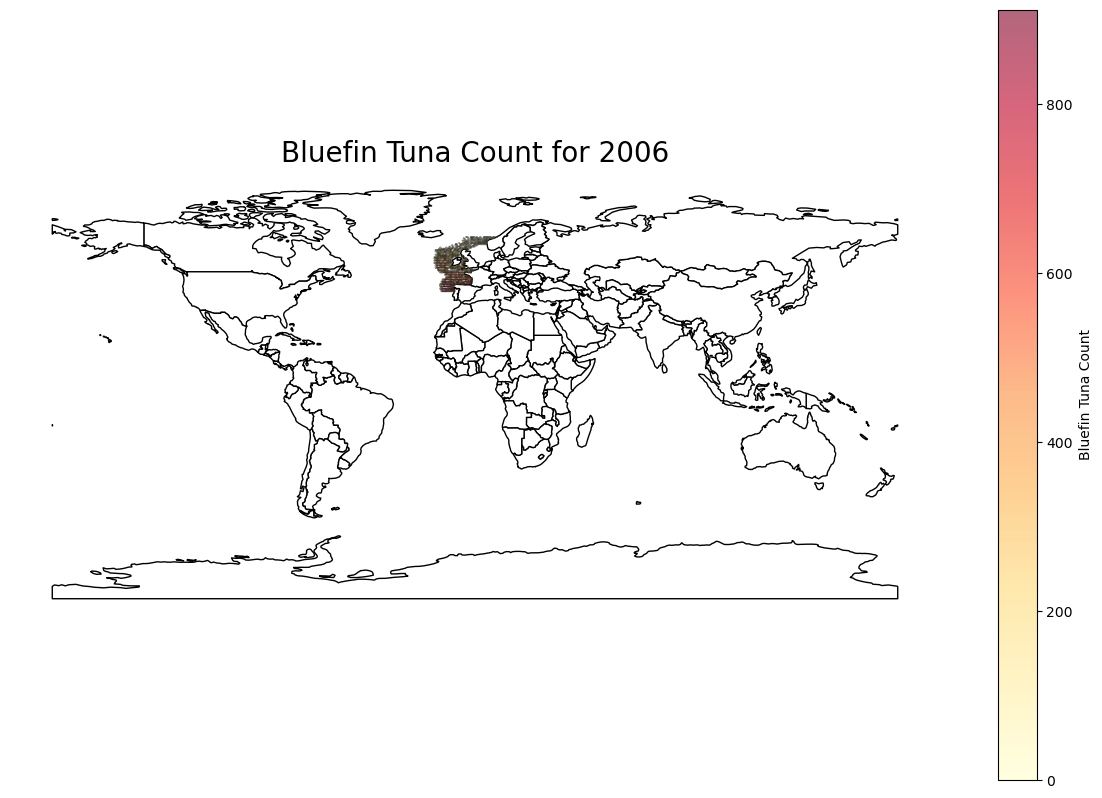

In [20]:
plot_bluefin_tuna_heatmap(geo_tuna, 2006)
plt.show() 